# 1.Variance Threshold

In [3]:
import pandas as pd
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})

In [6]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit_transform(df)
selected_features=df.columns[var_thres.get_support()]
print("Selected Features ",selected_features)

Selected Features  Index(['age', 'salary'], dtype='object')


# Scenario: Hospital Disease Prediction System

You are building a machine learning model to predict whether a patient has a particular disease.

The dataset contains the following features:

Age

Blood Pressure

Cholesterol Level

Gender

Country Code

Hospital ID

Machine Version Used for Testing

After initial exploration, you notice:

Country Code is 100% “India” for all records

Machine Version is 99% “v2.1” and only 1% “v2.2”
Hospital ID is same for all patients

❓ Question:

Which feature selection technique would you apply first?

Which features would likely be removed?

Why is removing these features important before training?

What problem might occur if you keep them?


In [8]:
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    "blood_pressure":[120,130,140,150,160],
    "cholesterol_level":[200,210,220,230,240],
    "heart_rate":[70,75,80,85,90],
    "country_code":[1,1,1,1,1],
    "hospital_id":[1,1,1,1,1],
    "machine_version":["v2.1","v2.1","v2.1","v2.2","v2.2"]
})

#Categorical Encoding

In [10]:
df_enc=pd.get_dummies(df,drop_first=True)

# Applying Threshold Varinace

In [11]:
selector = VarianceThreshold(threshold=0.01)
X_sel = selector.fit_transform(df_enc)

selected_cols = df_enc.columns[selector.get_support()]
print(selected_cols)


Index(['age', 'blood_pressure', 'cholesterol_level', 'heart_rate',
       'machine_version_v2.2'],
      dtype='object')


In [12]:
selector = VarianceThreshold(0)
X_sel = selector.fit_transform(df_enc)


In [13]:
df_clean = pd.DataFrame(X_sel, columns=selected_cols)
print(df_clean)


   age  blood_pressure  cholesterol_level  heart_rate  machine_version_v2.2
0   25             120                200          70                     0
1   30             130                210          75                     0
2   35             140                220          80                     0
3   40             150                230          85                     1
4   45             160                240          90                     1


# 2.Correlation Coefficients

In [14]:
import numpy as np
df=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'tiles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
df

,size_sqft,tiles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [15]:
correlation_matrix=df.corr()
print(correlation_matrix)

             size_sqft  tiles_count  price
size_sqft          1.0          1.0    1.0
tiles_count        1.0          1.0    1.0
price              1.0          1.0    1.0


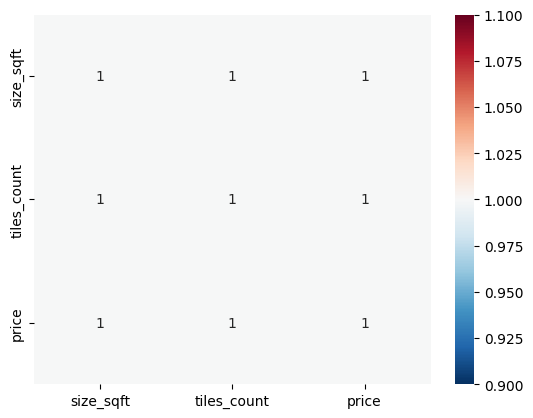

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r')
plt.show()

# Removing highly correlated features

In [18]:
import numpy as np

# correlation matrix
correlation_matrix = df.corr().abs()

# upper triangle
upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# columns to drop
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly Correlated Features:", to_drop)

# drop from dataframe
df_clean = df.drop(columns=to_drop)


Highly Correlated Features: ['tiles_count', 'price']


# 🏠 Scenario: Real Estate Price Prediction

You are developing a regression model to predict house prices.

Dataset contains:

House Size (sqft)

Number of Tiles

Total Construction Cost

Number of Bedrooms

Market Price

After calculating correlation matrix, you find:

House Size and Number of Tiles have 0.98 correlation

Construction Cost is highly correlated (0.95) with House Size

❓ Question:

Why is high correlation between features a problem?

Which feature(s) would you remove and why?

What issue can occur if highly correlated features are kept?

Which filter method is appropriate here?


In [19]:
data = {
    "House_Size": [1200, 1500, 1800, 2000, 2200],
    "Tiles": [600, 750, 900, 1000, 1100],
    "Construction_Cost": [60, 75, 90, 100, 110],
    "Bedrooms": [2, 3, 3, 4, 4],
    "Price": [50, 65, 80, 90, 105]
}

df = pd.DataFrame(data)

In [20]:
# correlation matrix
corr_matrix = df.corr()

# threshold
threshold = 0.9

In [21]:
# find highly correlated features
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# drop features
df_reduced = df.drop(columns=to_drop)

print("Highly correlated features removed:", to_drop)
print(df_reduced.head())

Highly correlated features removed: {'Construction_Cost', 'Tiles', 'Bedrooms', 'Price'}
   House_Size
0        1200
1        1500
2        1800
3        2000
4        2200


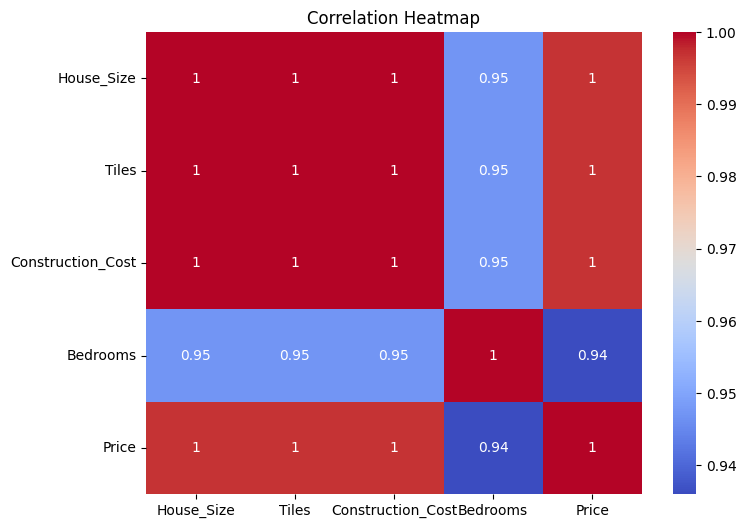

In [22]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 3.Chi Square test

In [30]:
X=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})
y=[0,1,1,0,1]
X

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [31]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

# scale features (chi2 requires non-negative)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# select top 2 features
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X_scaled, y)

# selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['married', 'income'], dtype='object')


# Scenario: Loan Approval Classification

You are building a classification model to predict whether a loan will be approved.

Dataset features:

Gender (Male/Female)

Marital Status (Yes/No)

Education Level (Graduate/Non-Graduate)

Applicant Income

Property Area (Urban/Rural)

Favorite Color

Loan Status (Approved/Rejected)

You want to identify which categorical features significantly influence loan approval.

❓ Question:

Which filter method is most appropriate here?

Which type of features can be tested using this method?

If “Favorite Color” has a very low chi-square score, what does it indicate?

Why is chi-square suitable only for classification problems?


In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest

# sample loan dataset
data = {
    "Gender": ["Male","Female","Male","Male","Female"],
    "Marital_Status": ["Yes","No","Yes","Yes","No"],
    "Education": ["Graduate","Graduate","Non-Graduate","Graduate","Non-Graduate"],
    "Applicant_Income": [5000,3000,4000,6000,3500],
    "Property_Area": ["Urban","Rural","Urban","Urban","Rural"],
    "Favorite_Color": ["Red","Blue","Green","Blue","Red"],
    "Loan_Status": ["Approved","Rejected","Approved","Approved","Rejected"]
}

df = pd.DataFrame(data)

In [33]:
y = df["Loan_Status"].map({"Approved":1, "Rejected":0})

# categorical features
X_cat = df.drop(columns=["Loan_Status","Applicant_Income"])

# one-hot encode categorical features
X_encoded = pd.get_dummies(X_cat)

# scale (chi2 needs non-negative)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [34]:
selector = SelectKBest(score_func=chi2, k="all")
selector.fit(X_scaled, y)

# scores table
scores = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Chi2_Score": selector.scores_
}).sort_values(by="Chi2_Score", ascending=False)

print(scores)

                   Feature  Chi2_Score
0            Gender_Female    3.000000
2        Marital_Status_No    3.000000
6      Property_Area_Rural    3.000000
1              Gender_Male    2.000000
3       Marital_Status_Yes    2.000000
7      Property_Area_Urban    2.000000
9     Favorite_Color_Green    0.666667
8      Favorite_Color_Blue    0.083333
5   Education_Non-Graduate    0.083333
10      Favorite_Color_Red    0.083333
4       Education_Graduate    0.055556


In [35]:
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X_scaled, y)

selected_features = X_encoded.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Gender_Female', 'Marital_Status_No', 'Property_Area_Rural'], dtype='object')
